## Assignment 4 - Customer Segmentation Analysis

### Vinayak (Team Lead) - 2019115121

### 1. Download the Dataset

### 2. Load the dataset into the tool

In [1]:
import pandas as pd
df = pd.read_csv("./Dataset/Mall_Customers.csv")

In [2]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### 3. Perform Visualizations

### Univariate Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Gender', ylabel='count'>

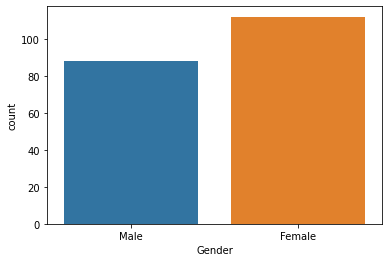

In [5]:
sns.countplot(df['Gender'])

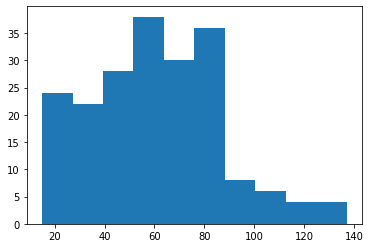

In [6]:
plt.hist(df['Annual Income (k$)'])
plt.show()

### Bi-Variate Analysis

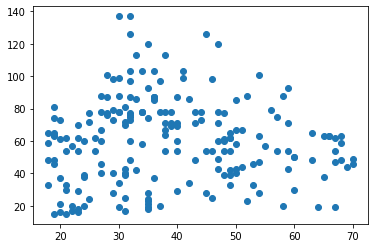

In [7]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.show()

<AxesSubplot: xlabel='Gender', ylabel='Spending Score (1-100)'>

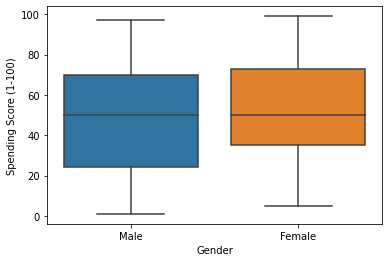

In [8]:
sns.boxplot(x = df['Gender'], y = df['Spending Score (1-100)'])

### Multi-Variate Analysis

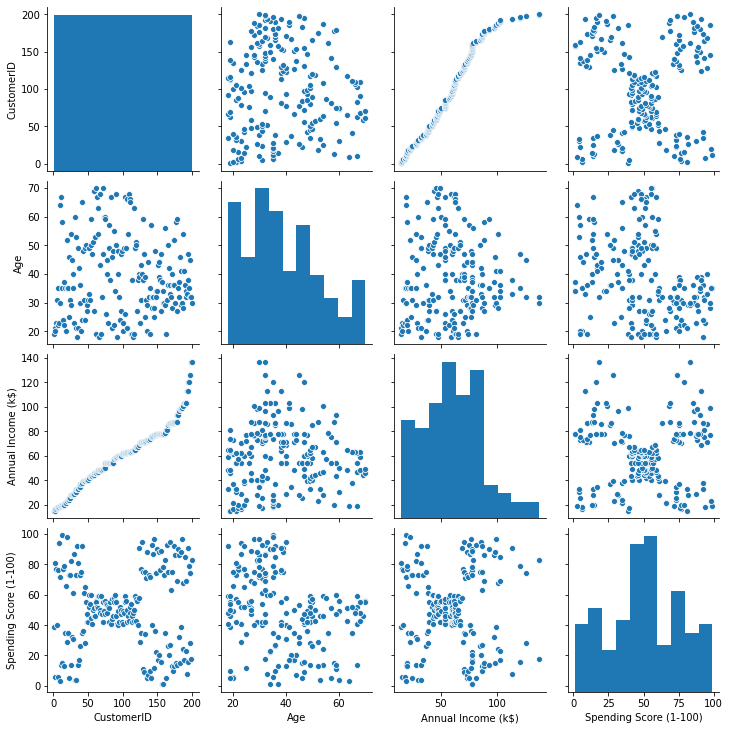

In [9]:
sns.pairplot(df, kind = "scatter")

<AxesSubplot: >

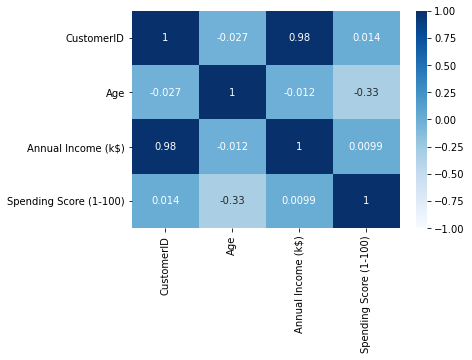

In [10]:
sns.heatmap(df.corr(), vmin = -1, center = 0, annot = True, cmap = 'Blues')

### 4. Perform descriptive statistics on the dataset

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 5. Check for Missing Values and deal with them

<AxesSubplot: >

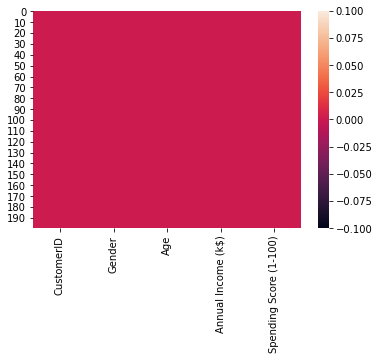

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 6. Find the outliers and replace the outliers

In [15]:
lst = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [16]:
df[lst].quantile(q = (0.25,0.75))

,Age,Annual Income (k$),Spending Score (1-100)
0.25,28.75,41.5,34.75
0.75,49.00,78.0,73.00


<AxesSubplot: >

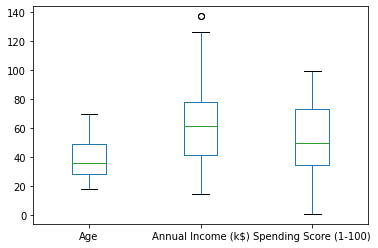

In [17]:
df[lst].plot(kind="box")

In [18]:
import numpy as np
print('MEAN:')
for x in lst:
    print(x, ':', np.mean(df[x]))

MEAN:
Age : 38.85
Annual Income (k$) : 60.56
Spending Score (1-100) : 50.2


In [19]:
for x in lst:
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df[x] = np.where(df[x] > upper, upper, df[x])
    df[x] = np.where(df[x] < lower, lower, df[x])

<AxesSubplot: >

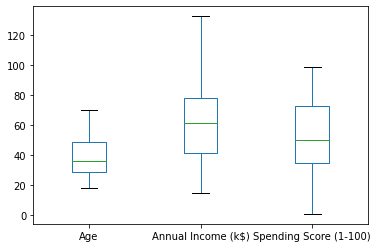

In [20]:
df[lst].plot(kind = "box")

### 7. Check for Categorical columns and perform encoding


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [23]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15.00,39.0
1,2,1,21.0,15.00,81.0
2,3,0,20.0,16.00,6.0
3,4,0,23.0,16.00,77.0
4,5,0,31.0,17.00,40.0
...,...,...,...,...,...
195,196,0,35.0,120.00,79.0
196,197,0,45.0,126.00,28.0
197,198,1,32.0,126.00,74.0
198,199,1,32.0,132.75,18.0


### 8. Scaling the data

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = sc.fit_transform(df)

In [25]:
df1

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.74542941, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.74542941,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70708307, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70708307,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66873673, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66873673,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.6303904 , -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.6303904 ,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.59204406, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.59204406,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.59204406, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.59204406,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.55369772, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

### 9. Perform any of the clustering algorithms

In [26]:
from sklearn.cluster import KMeans

In [27]:
df1 = df

In [28]:
df1.drop('CustomerID',axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.00,39.0
1,1,21.0,15.00,81.0
2,0,20.0,16.00,6.0
3,0,23.0,16.00,77.0
4,0,31.0,17.00,40.0
...,...,...,...,...
195,0,35.0,120.00,79.0
196,0,45.0,126.00,28.0
197,1,32.0,126.00,74.0
198,1,32.0,132.75,18.0


In [29]:
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15.00,39.0
1,2,1,21.0,15.00,81.0
2,3,0,20.0,16.00,6.0
3,4,0,23.0,16.00,77.0
4,5,0,31.0,17.00,40.0
...,...,...,...,...,...
195,196,0,35.0,120.00,79.0
196,197,0,45.0,126.00,28.0
197,198,1,32.0,126.00,74.0
198,199,1,32.0,132.75,18.0


In [30]:
import matplotlib.pyplot as plt

TWSS = []
k = list(range(2,11))

for i in k:
    km = KMeans(n_clusters = i,init = 'k-means++',n_init = 10, max_iter = 100, random_state = 0)
    km.fit(df1)
    TWSS.append(km.inertia_)

C:\Users\vasur\anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vasur\anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vasur\anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vasur\anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans 

Text(0, 0.5, 'TWSS')

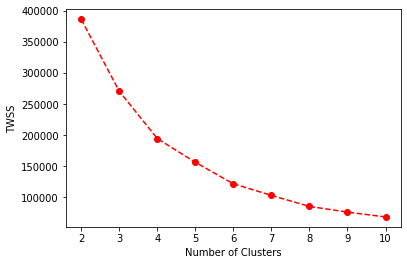

In [31]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('Number of Clusters')
plt.ylabel('TWSS')

In [32]:
km = KMeans(n_clusters = 4, init = 'random', n_init=10, max_iter=300,tol=1e-04, random_state=0)

### 10. Add the cluster data with the primary dataset

In [33]:
df['Cluster'] = km.fit_predict(df1)

C:\Users\vasur\anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19.0,15.00,39.0,0
1,2,1,21.0,15.00,81.0,0
2,3,0,20.0,16.00,6.0,0
3,4,0,23.0,16.00,77.0,0
4,5,0,31.0,17.00,40.0,0
...,...,...,...,...,...,...
195,196,0,35.0,120.00,79.0,2
196,197,0,45.0,126.00,28.0,1
197,198,1,32.0,126.00,74.0,2
198,199,1,32.0,132.75,18.0,1


In [35]:
df['Cluster'].value_counts()

3    66
0    59
2    39
1    36
Name: Cluster, dtype: int64

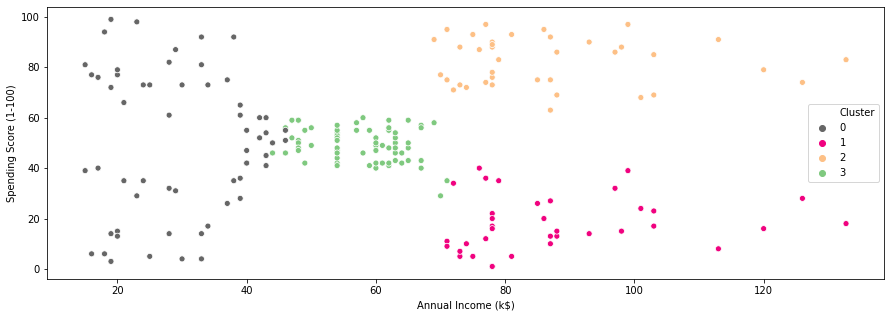

In [36]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['Cluster'], palette = 'Accent_r')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(df,  km.labels_,  metric='euclidean')
score

0.42337339370528554

### 11. Split the data into dependent and independent variables.


##### Dependent Variable

In [38]:
y = df['Cluster']
y

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    1
197    2
198    1
199    2
Name: Cluster, Length: 200, dtype: int32

#### Independent Variable

In [39]:
x = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.00,39.0
1,1,21.0,15.00,81.0
2,0,20.0,16.00,6.0
3,0,23.0,16.00,77.0
4,0,31.0,17.00,40.0
...,...,...,...,...
195,0,35.0,120.00,79.0
196,0,45.0,126.00,28.0
197,1,32.0,126.00,74.0
198,1,32.0,132.75,18.0


### 12. Split the data into training and testing

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [42]:
x_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35.0,120.0,79.0
24,0,54.0,28.0,14.0
117,0,49.0,65.0,59.0
169,1,32.0,87.0,63.0
45,0,24.0,39.0,65.0
...,...,...,...,...
80,1,57.0,54.0,51.0
179,1,35.0,93.0,90.0
112,0,38.0,64.0,42.0
21,1,25.0,24.0,73.0


In [43]:
x_test

,Gender,Age,Annual Income (k$),Spending Score (1-100)
61,1,19.0,46.0,55.0
65,1,18.0,48.0,59.0
151,1,39.0,78.0,88.0
29,0,23.0,29.0,87.0
67,0,68.0,48.0,48.0
93,0,40.0,60.0,40.0
192,1,33.0,113.0,8.0
54,0,50.0,43.0,45.0
111,0,19.0,63.0,54.0
190,0,34.0,103.0,23.0


In [44]:
y_train

195    2
24     0
117    3
169    2
45     0
      ..
80     3
179    2
112    3
21     0
101    3
Name: Cluster, Length: 160, dtype: int32

In [45]:
y_test

61     0
65     3
151    2
29     0
67     3
93     3
192    1
54     0
111    3
190    1
60     3
152    1
149    2
184    1
50     0
53     0
98     3
30     0
40     0
107    3
51     0
133    2
185    2
19     0
32     0
47     0
172    1
96     3
78     3
135    2
154    1
148    1
33     0
183    2
143    2
120    3
48     0
122    3
132    1
68     3
Name: Cluster, dtype: int32

### 13. Build the Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

### 14. Train the Model

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

### 15. Test the Model

In [49]:
y_pred = rf.predict(x_test)

y_pred

array([3, 3, 2, 0, 3, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 0, 3, 0, 0, 3, 0, 2,
       2, 0, 0, 0, 1, 3, 3, 2, 1, 1, 0, 2, 2, 3, 0, 3, 3, 3])

### 16. Measure the performance using Evaluation Metrics

#### Confusion Matrix

In [50]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[12,  0,  0,  1],
       [ 0,  7,  0,  1],
       [ 0,  0,  7,  0],
       [ 0,  0,  0, 12]], dtype=int64)

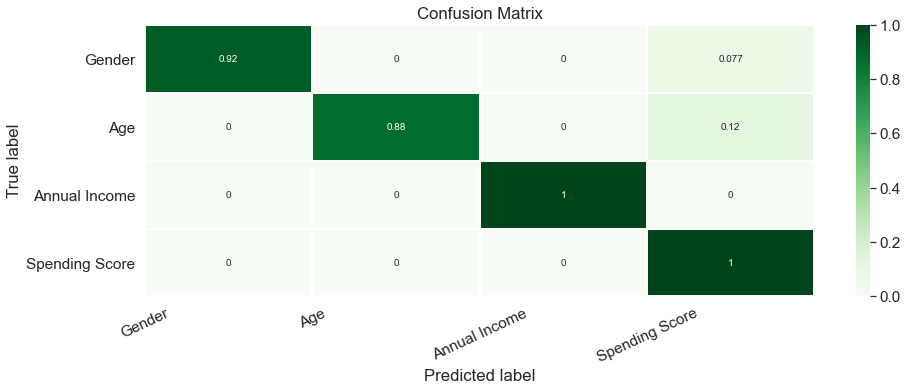

In [51]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (15,5))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Gender', 'Age', 'Annual Income', 'Spending Score']

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation = 25)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#### Different Metrics

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         7
           3       0.86      1.00      0.92        12

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40

